<a href="https://colab.research.google.com/github/TOM-PT/Public-projects/blob/master/Unsupervised_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning
## DSSP Team
## Summer 2020

## PCA

We will consider a _classical_ dataset __decathlon__. It contains the performance of several athletes during two decathlons in 2004 the Decastar and the Olympic Game. Each observation consists of

- the 10 raw performance in the 10 events,
- the ranking in the event,
- the total number of points,
- the name of the event.

We will mainly focus on the 10 first columns corresponding to the raw athletic performance but will also use the total number of points in some plots.

In [5]:
pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=4c6f4594e066c02c8ad51d92b5c0ed4eefdd0c1b47431c075c506488d2c0f904
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
import plotly.graph_objects as go # Pour les graphes en 3D
import plotly.io as pio
#pio.renderers.default = 'notebook'
from sklearn import decomposition #PCA
from adjustText import adjust_text #text labels placement
from scipy.linalg import sqrtm #square root of a matrix

In [7]:
decathlon = pd.read_csv("http://www.cmap.polytechnique.fr/~aymeric.dieuleveut/decathlon.txt", sep='\t')
decathlon

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,6,8030,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar


In [8]:
decathlon.describe()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


### Pairwise analysis

__1)__ Use `seaborn` to plot the two first coordinates (__100m__ and __Long.jump__) adding the __Points__ information as a color as well as a regression line.

__Hint:__ You can use the `'viridis'` palette to have better colors and `adjust_text` to have a better text placement.

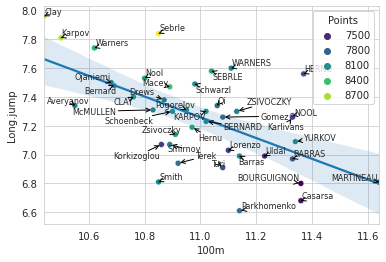

In [9]:
#solution

sns.regplot(data=decathlon, x='100m', y='Long.jump', scatter=False);
sns.scatterplot(data=decathlon, x='100m', y='Long.jump', hue='Points',
palette='viridis')
texts = [
    plt.text(x, y, s, fontsize=8, horizontalalignment='center', verticalalignment='bottom')
    for x, y, s in zip(decathlon['100m'], decathlon['Long.jump'], decathlon.index)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'));
plt.show()

In [10]:
# Plus on court vite au 100 m, plus on sera capable de sauter loin
# Axe vertical : ceux qui courent vite (en jaune en haut)


__2)__ Do you think those values are correlated?

In [11]:
# solution
# yes!
# La courbe montre que les variables sont corrélées

__3)__ Compute the correlation matrix between the 10 first variables and display it use a heatmap.

In [12]:
#solution
decathlon.iloc[:,0:10].corr()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
100m,1.000000,-0.598678,-0.356482,-0.246253,0.520298,0.579889,-0.221708,-0.082537,-0.157746,-0.060546
Long.jump,-0.598678,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014,0.119759,-0.033686
Shot.put,-0.356482,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182,0.374956,0.115803
High.jump,-0.246253,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181,0.171880,-0.044903
400m,0.520298,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292,0.004232,0.408106
110m.hurdle,0.579889,-0.505410,-0.251616,-0.283289,0.547988,1.000000,-0.326201,-0.002704,0.008743,0.037540
Discus,-0.221708,0.194310,0.615768,0.369218,-0.117879,-0.326201,1.000000,-0.150072,0.157890,0.258175
Pole.vault,-0.082537,0.204014,0.061182,-0.156181,-0.079292,-0.002704,-0.150072,1.000000,-0.030001,0.247448
Javeline,-0.157746,0.119759,0.374956,0.171880,0.004232,0.008743,0.157890,-0.030001,1.000000,-0.180393
1500m,-0.060546,-0.033686,0.115803,-0.044903,0.408106,0.037540,0.258175,0.247448,-0.180393,1.000000


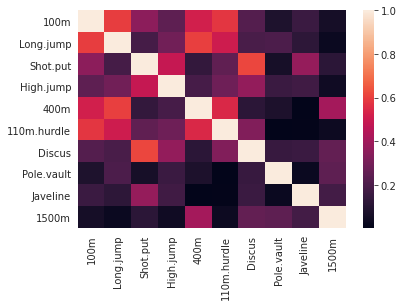

In [13]:
#solution
sns.heatmap(np.abs(decathlon.iloc[:,0:10].corr()));

__4)__ Can you guess which are the most correlated variables and the least ones?

In [14]:
#solution
#Most correlated: 100.m and Long.jump, Discus and Shot.put..
#Least correlated: Pole.vault and 100m, 100m and 1500m

__5)__ Confirm those findings by looking at the pairwise scatterplot.

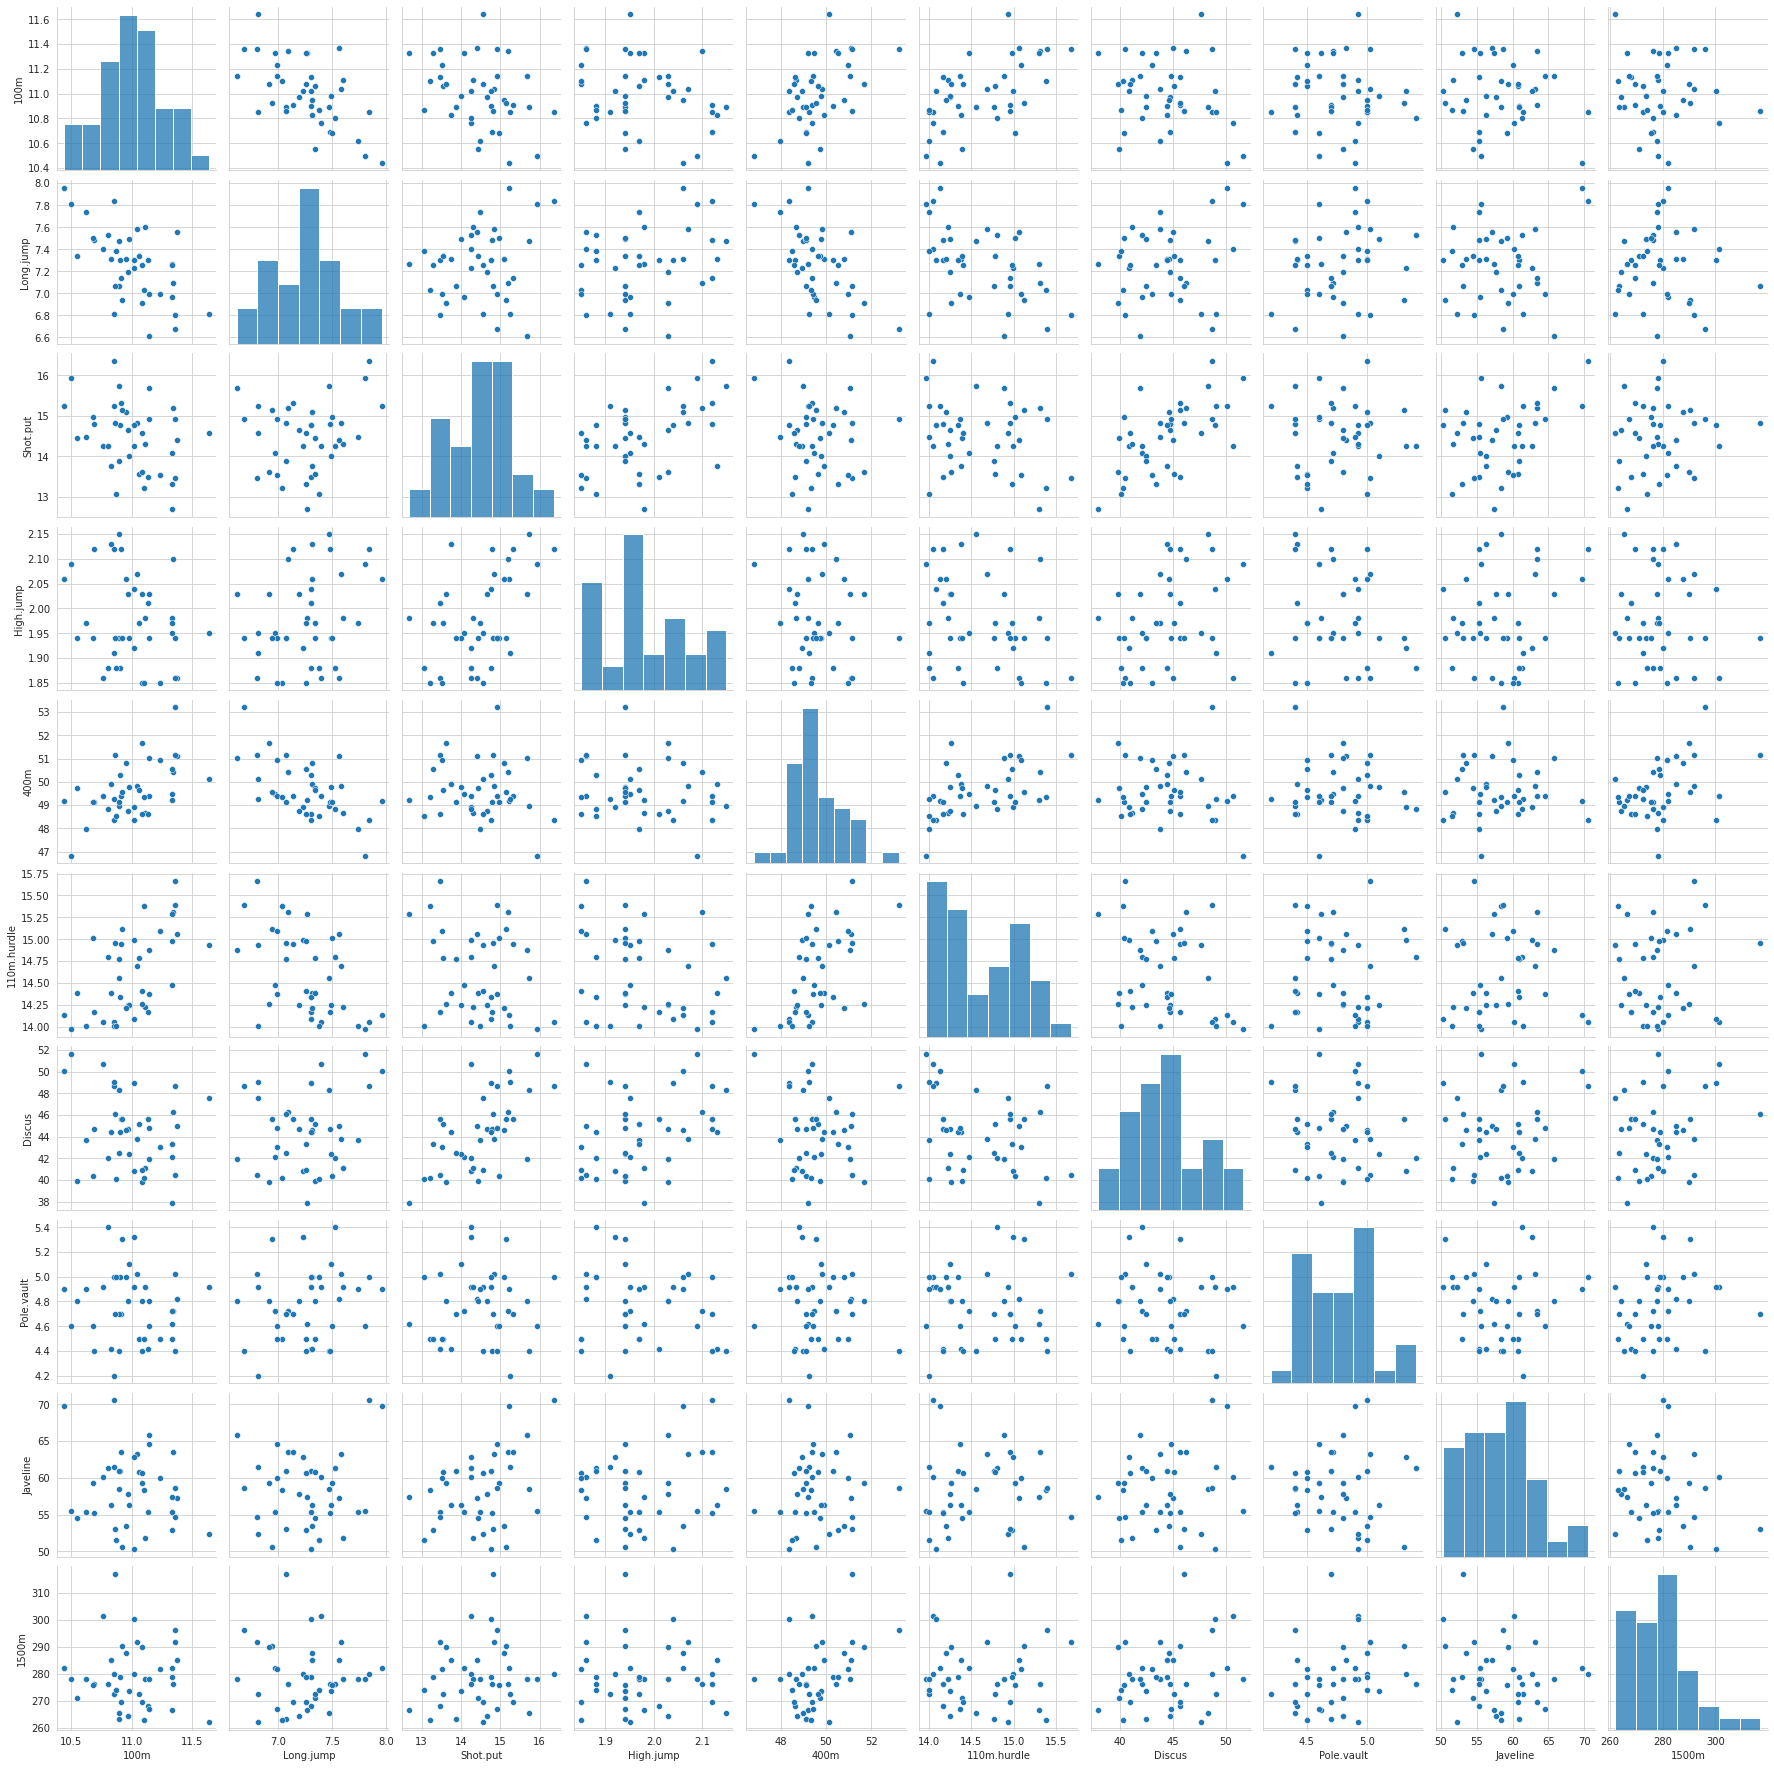

In [15]:
#solution
sns.pairplot(decathlon.iloc[:,0:10]);

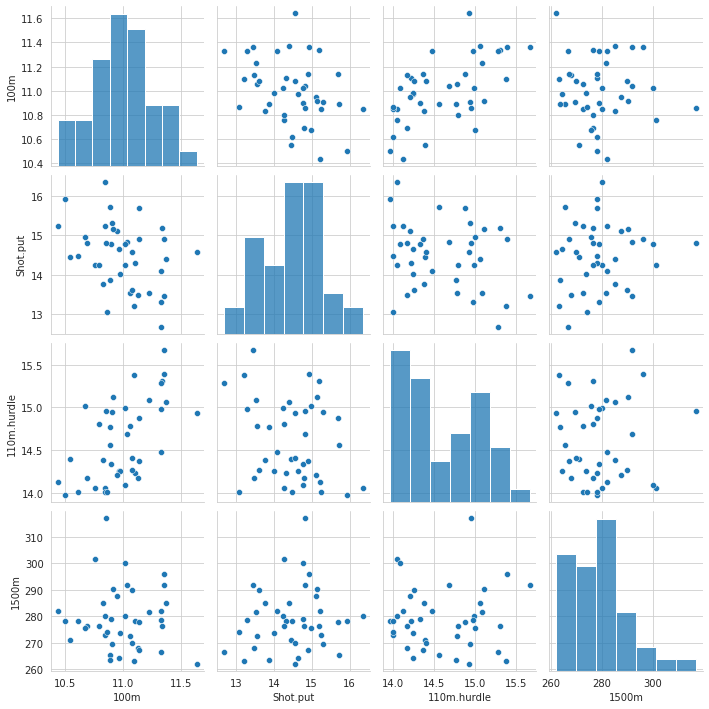

In [16]:
#solution
sns.pairplot(decathlon.iloc[:, [0, 2, 5,9]]);

### 3d plot

We are now ready to use `plotly` to visualize the dataset in 3d.

A 3d scatter plot can be obtained with the following code: 

In [17]:
scat = go.Scatter3d(x=decathlon['100m'], y=decathlon['Long.jump'], z=decathlon['Shot.put'],
    mode='markers',
    marker=dict(color=decathlon['Points'],
        colorscale='viridis',
        showscale=True))
fig = go.Figure()
fig.add_trace(scat)
fig.update_layout(scene=dict(camera=dict(projection=dict(type='orthographic')),
    xaxis=dict(showspikes=False),
    yaxis=dict(showspikes=False),
    zaxis=dict(showspikes=False),
    )
    )
fig.update_traces()
fig.show()

Note that we have used a orthographic projection rather than a perspective one.

__6)__ Play with this interactive graphic to find he projection that appears to lose the less information?

__7)__ This task is similar to the PCA where we look a the subspace that minimizes the error between the data and its projection. Draw the ellipse corresponding to the eigenvectors and the eigenvalues of the covariance matrix to verify this.

__Hint:__ Use the `Mesh3d` layer of `plotly` with the `alphahull=0` option and the following ellipse generating code:

In [18]:
def sphere():
    theta = np.arange(-np.pi / 2, np.pi / 2, 0.1)
    phi = np.arange(0, 2 * np.pi, 0.1)
    x = np.cos(theta[:, None]) * np.cos(phi[None, :])
    y = np.cos(theta[:, None]) * np.sin(phi[None ,:])
    z = np.sin(theta[:, None]) * np.ones(phi.shape)[None, :]
    return(np.vstack((x.flatten(), y.flatten(), z.flatten())).T)


In [19]:
def ellipse3d(mean, cov):
    return(1.95 * sphere().dot(sqrtm(cov))\
        + mean[None, :])

In [20]:
#solution
ellipse = ellipse3d(decathlon.iloc[:, 0:3].mean(), decathlon.iloc[:, 0:3].cov())
scat = go.Scatter3d(x=decathlon['100m'], y=decathlon['Long.jump'], z=decathlon['Shot.put'],
    mode='markers',
    marker=dict(color=decathlon['Points'],
        colorscale='viridis',
        showscale=True))
ell = go.Mesh3d(x=ellipse[:, 0], y=ellipse[:, 1], z=ellipse[:, 2],
    opacity=.1, alphahull=0)
fig = go.Figure()
fig.add_trace(scat)
fig.add_trace(ell)
fig.update_layout(scene=dict(camera=dict(projection=dict(type='orthographic')),
    xaxis=dict(showspikes=False),
    yaxis=dict(showspikes=False),
    zaxis=dict(showspikes=False),
    ))
fig.update_traces()
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



__8)__ Can you verify that the best subspace is defined by the direction of the eigenvectors with the largest eigenvalues?

### Scaling?

So far, we have use the raw performance. That is we compare duration with length as well as 100m time with 1500m time. Obviously, this is not a good idea. All those values should be measured in a common scale. The most classical technique is to _normalize_ by substracting its mean and dividing by the standard deviation. After doing thiw, we may repeat all the previous experiments with those rescaled data.

__9)__ Make a copy of the decathlon dataframe and normalize the 10 first columns of this new data frame.

__Hint:__ Use `apply` and a lambda function. 

In [42]:
#solution
decathlon_scaled = decathlon.copy()
decathlon_scaled.iloc[:, 0:10] = decathlon_scaled.iloc[:, 0:10].\
    apply(lambda x: (x - np.mean(x)) / np.std(x))

In [22]:
#solution
decathlon_scaled

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,0.161478,1.023937e+00,0.433405,1.060457,0.169981,0.180572,-0.172524,0.937988,1.022196,1.099316,1,8217,Decastar
CLAY,-0.916293,4.479724e-01,-0.266573,-1.329735,-0.216222,-1.192819,1.916555,0.573807,0.384558,1.949271,2,8122,Decastar
KARPOV,0.084494,1.279921e-01,0.359723,0.719001,-1.093956,-1.106982,1.386043,0.573807,-1.679377,1.836522,3,8099,Decastar
BERNARD,0.084494,-9.599408e-02,-0.278853,-0.646823,-0.602425,0.824348,-1.035731,2.030532,0.934101,0.093246,4,8067,Decastar
YURKOV,1.316232,-5.439665e-01,0.875496,1.401913,0.705398,1.511044,0.579784,-0.154555,1.074633,-0.227656,5,8036,Decastar
WARNERS,0.430920,1.087933e+00,-0.205171,0.036089,-0.821859,-0.806553,-0.966794,0.573807,-1.373143,-0.080215,6,8030,Decastar
ZSIVOCZKY,0.507904,1.279921e-01,-1.224437,0.377545,-0.874523,-0.935308,0.402947,-1.247098,-0.618045,-0.956190,7,8004,Decastar
McMULLEN,-0.646850,1.599901e-01,-0.880588,1.743369,0.257754,-0.484665,0.025294,-1.247098,-0.408295,0.526896,8,7995,Decastar
MARTINEAU,2.470986,-1.439911e+00,0.114117,-0.305367,0.459633,0.695593,0.981415,0.573807,-1.255683,-1.467898,9,7802,Decastar
HERNU,1.431707,9.599408e-01,-0.082368,-1.329735,1.302257,0.974563,0.199134,0.209626,-0.236301,0.526896,10,7733,Decastar


__10)__ Plot the corresponding scatter plot and compare it with the one obtained with the raw data.

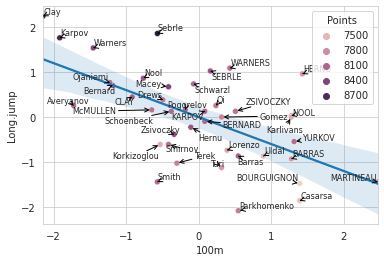

In [23]:
#solution
sns.regplot(data=decathlon_scaled, x='100m', y='Long.jump', scatter=False);
sns.scatterplot(data=decathlon_scaled, x='100m', y='Long.jump', hue='Points')
texts = [
    plt.text(x, y, s, fontsize=8, horizontalalignment='center', verticalalignment='bottom')
    for x, y, s in zip(decathlon_scaled['100m'], decathlon_scaled['Long.jump'], decathlon_scaled.index)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'));

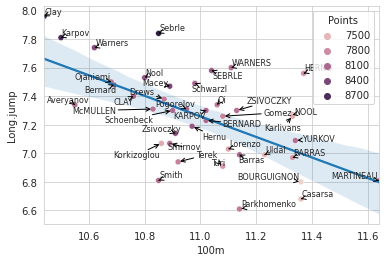

In [24]:
#solution
sns.regplot(data=decathlon, x='100m', y='Long.jump', scatter=False);
sns.scatterplot(data=decathlon, x='100m', y='Long.jump', hue='Points')
texts = [
    plt.text(x, y, s, fontsize=8, horizontalalignment='center', verticalalignment='bottom')
    for x, y, s in zip(decathlon['100m'], decathlon['Long.jump'], decathlon.index)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'));

__11)__ What if one imposes _equal_ axis?

__Hint:__ Use `plt.axis('equal')`.

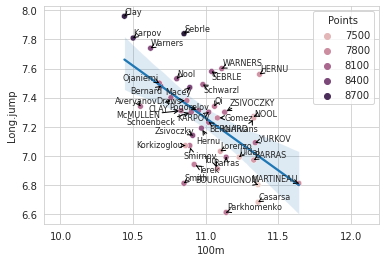

In [25]:
#solution
sns.regplot(data=decathlon, x='100m', y='Long.jump', scatter=False);
sns.scatterplot(data=decathlon, x='100m', y='Long.jump', hue='Points')
texts = [
    plt.text(x, y, s, fontsize=8, horizontalalignment='center', verticalalignment='bottom')
    for x, y, s in zip(decathlon['100m'], decathlon['Long.jump'], decathlon.index)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'))
plt.axis('equal');

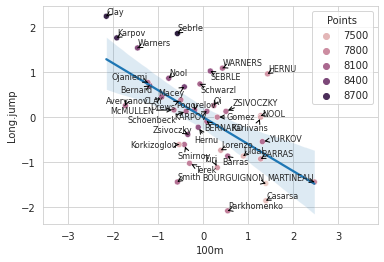

In [26]:
#solution
sns.regplot(data=decathlon_scaled, x='100m', y='Long.jump', scatter=False);
sns.scatterplot(data=decathlon_scaled, x='100m', y='Long.jump', hue='Points')
texts = [
    plt.text(x, y, s, fontsize=8, horizontalalignment='center', verticalalignment='bottom')
    for x, y, s in zip(decathlon_scaled['100m'], decathlon_scaled['Long.jump'], decathlon_scaled.index)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'))
plt.axis('equal');

__12)__ Repeat the same experiment replacing the `100m` by the `1500m`.

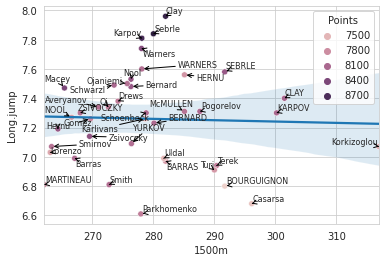

In [27]:
#solution
sns.regplot(data=decathlon, x='1500m', y='Long.jump', scatter=False);
sns.scatterplot(data=decathlon, x='1500m', y='Long.jump', hue='Points')
texts = [
    plt.text(x, y, s, fontsize=8, horizontalalignment='center', verticalalignment='bottom')
    for x, y, s in zip(decathlon['1500m'], decathlon['Long.jump'], decathlon.index)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'));

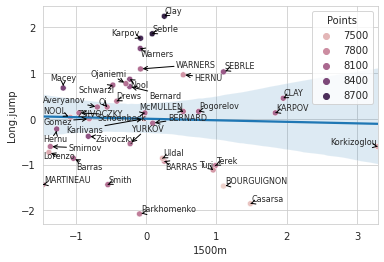

In [28]:
#solution
sns.regplot(data=decathlon_scaled, x='1500m', y='Long.jump', scatter=False);
sns.scatterplot(data=decathlon_scaled, x='1500m', y='Long.jump', hue='Points')
texts = [
    plt.text(x, y, s, fontsize=8, horizontalalignment='center', verticalalignment='bottom')
    for x, y, s in zip(decathlon_scaled['1500m'], decathlon_scaled['Long.jump'], decathlon_scaled.index)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'));

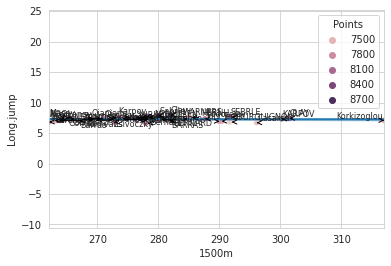

In [29]:
#solution
sns.regplot(data=decathlon, x='1500m', y='Long.jump', scatter=False);
sns.scatterplot(data=decathlon, x='1500m', y='Long.jump', hue='Points')
texts = [
    plt.text(x, y, s, fontsize=8, horizontalalignment='center', verticalalignment='bottom')
    for x, y, s in zip(decathlon['1500m'], decathlon['Long.jump'], decathlon.index)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'))
plt.axis('equal');

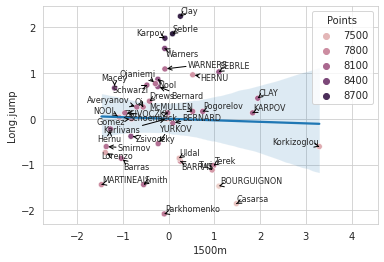

In [30]:
#solution
sns.regplot(data=decathlon_scaled, x='1500m', y='Long.jump', scatter=False);
sns.scatterplot(data=decathlon_scaled, x='1500m', y='Long.jump', hue='Points')
texts = [
    plt.text(x, y, s, fontsize=8, horizontalalignment='center', verticalalignment='bottom')
    for x, y, s in zip(decathlon_scaled['1500m'], decathlon_scaled['Long.jump'], decathlon_scaled.index)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'))
plt.axis('equal');

__13)__ What about the correlation matrix, the pairwise scatterplots and the 3d plot?

In [31]:
#solution
decathlon_scaled.iloc[:,1:10].corr()

,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
Long.jump,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014,0.119759,-0.033686
Shot.put,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182,0.374956,0.115803
High.jump,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181,0.171880,-0.044903
400m,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292,0.004232,0.408106
110m.hurdle,-0.505410,-0.251616,-0.283289,0.547988,1.000000,-0.326201,-0.002704,0.008743,0.037540
Discus,0.194310,0.615768,0.369218,-0.117879,-0.326201,1.000000,-0.150072,0.157890,0.258175
Pole.vault,0.204014,0.061182,-0.156181,-0.079292,-0.002704,-0.150072,1.000000,-0.030001,0.247448
Javeline,0.119759,0.374956,0.171880,0.004232,0.008743,0.157890,-0.030001,1.000000,-0.180393
1500m,-0.033686,0.115803,-0.044903,0.408106,0.037540,0.258175,0.247448,-0.180393,1.000000


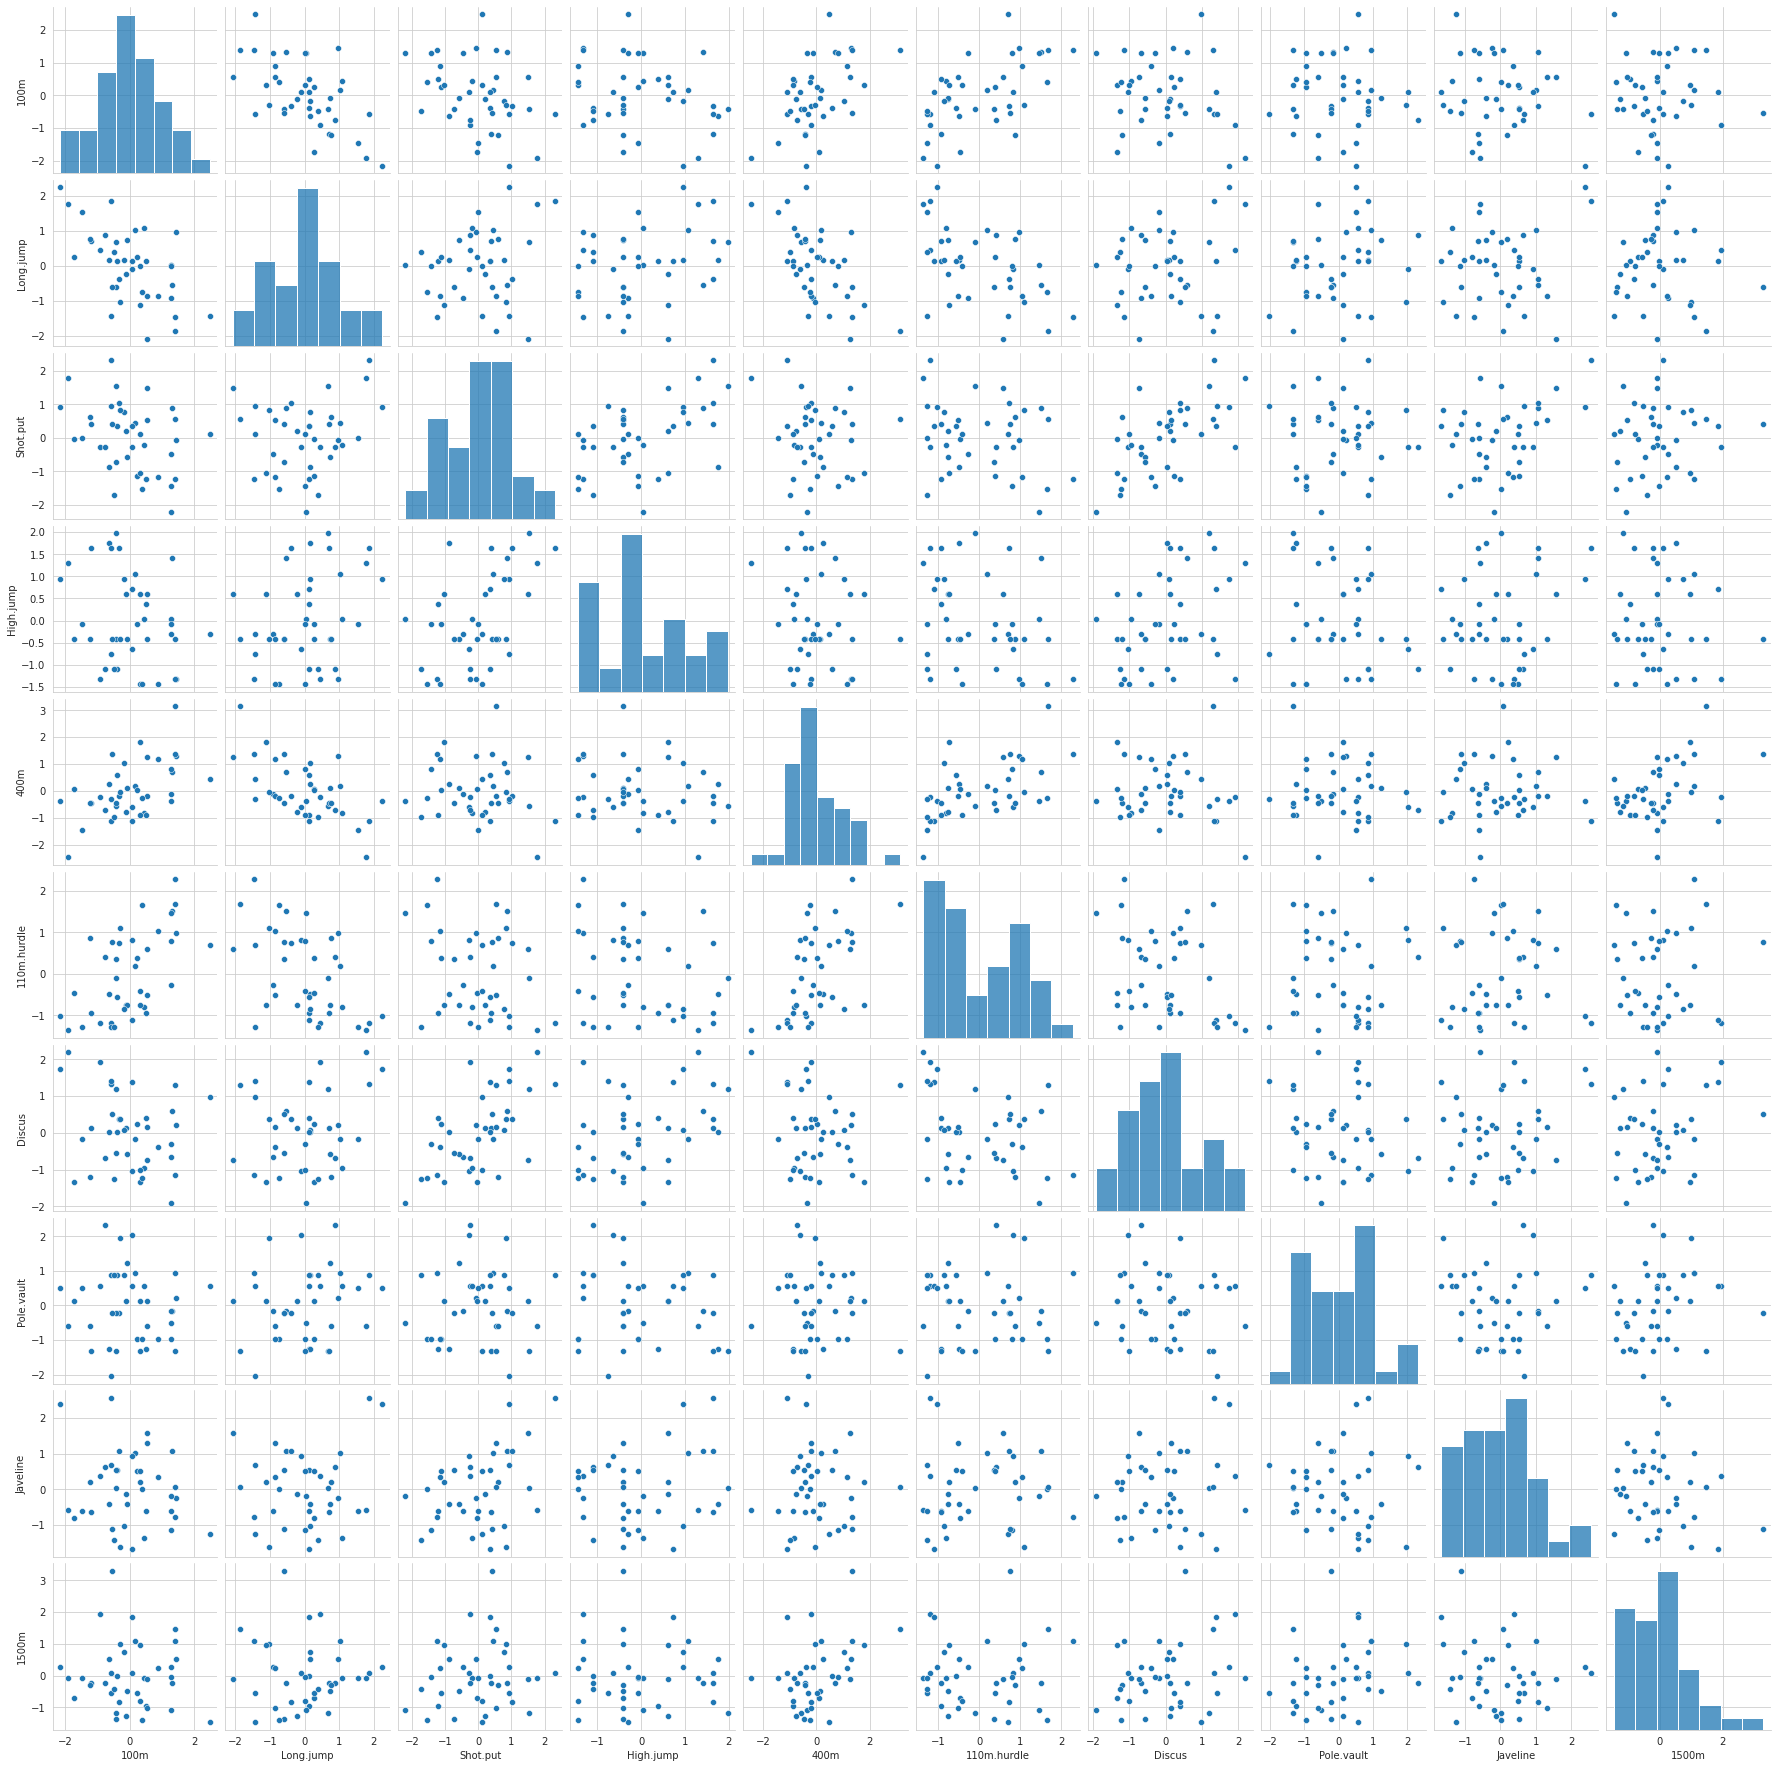

In [32]:
#solution
sns.pairplot(decathlon_scaled.iloc[:,0:10]);

In [33]:
#solution
ellipse = ellipse3d(decathlon_scaled.iloc[:, 0:3].mean(), decathlon_scaled.iloc[:, 0:3].cov())
scat = go.Scatter3d(x=decathlon_scaled['100m'], y=decathlon_scaled['Long.jump'], z=decathlon_scaled['Shot.put'],
    mode='markers',
    marker=dict(color=decathlon_scaled['Points'],
        colorscale='viridis',
        showscale=True))
ell = go.Mesh3d(x=ellipse[:, 0], y=ellipse[:, 1], z=ellipse[:, 2],
    opacity=.1, alphahull=0)
fig = go.Figure()
fig.add_trace(scat)
fig.add_trace(ell)
fig.update_layout(scene=dict(camera=dict(projection=dict(type='orthographic')),
    xaxis=dict(showspikes=False),
    yaxis=dict(showspikes=False),
    zaxis=dict(showspikes=False),
    ))
fig.update_traces()
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



### Principal Component Analysis

The library `scikit-learn` contains a PCA function that we are going to use.

In [51]:
pca_scaled = decomposition.PCA(n_components=10).fit(decathlon_scaled.iloc[:, 0:10])
decathlon_scaled_pca = pca_scaled.transform(decathlon_scaled.iloc[:, 0:10])

`pca_scaled` contains the all the information computed by the PCA (for instance the eigenvalues in the field `singular_values_`, the change of basis matrix in `components_`) and `decathlon_scaled_pca` contains the coordinates of `decathlon_scaled` in the PCA basis.

__14)__ Verify the the coordinates in the PCA basis can be obtained by a product between the coordinates in the old basis and the change of basis matrix

In [44]:
#solution
np.max(np.abs(decathlon_scaled_pca - decathlon_scaled.iloc[:, 0:10].values.dot(pca_scaled.components_.T)))

9.769962616701378e-15

__15)__ Plot the points in the new coordinates

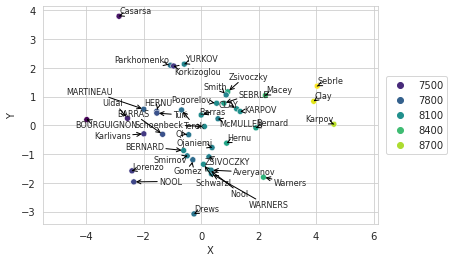

In [45]:
#solution
decathlon_scaled_pca_df = pd.DataFrame({'X': decathlon_scaled_pca[:, 0],
    'Y': decathlon_scaled_pca[:, 1]},
    index = decathlon.index)
decathlon_scaled_pca_df['Points'] = decathlon['Points']
sns.scatterplot(data=decathlon_scaled_pca_df, x='X', y='Y', hue='Points', palette='viridis')
texts = [
    plt.text(x, y, s, fontsize=8, horizontalalignment='center', verticalalignment='bottom')
    for x, y, s in zip(decathlon_scaled_pca_df['X'], decathlon_scaled_pca_df['Y'], decathlon_scaled_pca_df.index)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'))
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
plt.axis('equal');

Axe horizontal : vers la droite => les plus rapides
Axe vertical : l'explosivité

__16)__ In statistics, one often looks at the correlation between the new axis and the old ones. This can be computed in Python with

In [46]:
decathlon_scaled_pca_nor = decathlon_scaled_pca/np.sqrt((decathlon_scaled_pca ** 2).sum(axis=0))
decathlon_scaled_nor = decathlon_scaled.iloc[:, 0:10]/np.sqrt((decathlon_scaled.iloc[:, 0:10] ** 2).sum(axis=0))
decathlon_corr_circle = decathlon_scaled_pca_nor.T.dot(decathlon_scaled_nor)
decathlon_corr_circle

array([[-0.77471983,  0.74189974,  0.62250255,  0.5719453 , -0.67960994,
        -0.74624532,  0.55246652,  0.05034151,  0.27711085, -0.05807706],
       [ 0.18714199, -0.34542129,  0.59830332,  0.35029361,  0.56943778,
         0.22879335,  0.60631339, -0.18035687,  0.31698906,  0.47422377],
       [-0.18440714,  0.18221105, -0.02337844, -0.25951193,  0.1314697 ,
        -0.09263738,  0.04295225,  0.69175665, -0.38965541,  0.7821428 ],
       [-0.03781826,  0.10178564,  0.19059161, -0.1355942 ,  0.02930198,
         0.29083103, -0.25967143,  0.55153397,  0.71227728, -0.16108904],
       [-0.30219639, -0.03667805, -0.11115082, -0.55543957,  0.08769157,
        -0.16432095,  0.10482712, -0.32995932,  0.30512892,  0.15356189],
       [ 0.22920075, -0.23697868,  0.23647411, -0.3621131 , -0.25741324,
        -0.07713202,  0.34787054,  0.20256095, -0.12633919, -0.23089724],
       [-0.25645445, -0.42164691,  0.2080551 ,  0.06143068,  0.08357871,
        -0.24003322, -0.28877439,  0.06580383

Note that by construction the norm of the correlation vector for a given original axis is 1.

In [47]:
(decathlon_corr_circle ** 2).sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Plot the correlation of the original axes with the two first new components

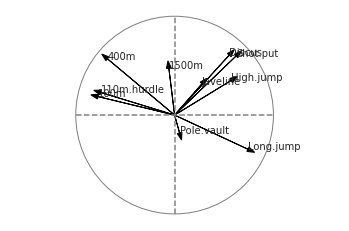

In [48]:
#solution
pcs = decathlon_corr_circle
fig, ax = plt.subplots()
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, head_width=.05, color='k')
texts = [ 
    plt.text(x, y, decathlon_scaled.columns[i])
    for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :]))
]
#adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'))
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axis('equal')
plt.grid(b=None)
plt.gca().axison = False
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='grey')
ax.add_patch(circle);

__17)__ Which variables are well captured? Can you interpret the new axes (the horizontal and the vertical ones)? 
Can you explain why the long jump appears to be the opposite of the 100m?

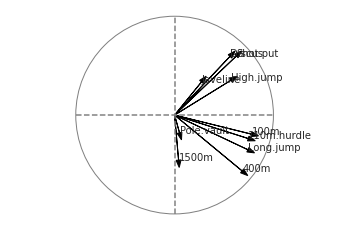

In [49]:
#solution
decathlon_mod = decathlon.copy()
decathlon_mod['100m'] = 100 / decathlon_mod['100m'] 
decathlon_mod['400m'] = 400 / decathlon_mod['400m']
decathlon_mod['110m.hurdle'] = 110 / decathlon_mod['110m.hurdle']
decathlon_mod['1500m'] = 1500 / decathlon_mod['1500m'] 
decathlon_mod_scaled = decathlon_mod.copy()
decathlon_mod_scaled.iloc[:, 0:10] = decathlon_mod_scaled.iloc[:, 0:10].\
    apply(lambda x: (x - np.mean(x)) / np.std(x))
pca_scaled = decomposition.PCA(n_components=10).fit(decathlon_mod_scaled.iloc[:, 0:10])
decathlon_mod_scaled_pca = pca_scaled.transform(decathlon_mod_scaled.iloc[:, 0:10])
decathlon_mod_scaled_pca_nor = decathlon_mod_scaled_pca/np.sqrt((decathlon_mod_scaled_pca ** 2).sum(axis=0))
decathlon_mod_scaled_nor = decathlon_mod_scaled.iloc[:, 0:10]/np.sqrt((decathlon_mod_scaled.iloc[:, 0:10] ** 2).sum(axis=0))
decathlon_corr_circle = decathlon_mod_scaled_pca_nor.T.dot(decathlon_mod_scaled_nor)
pcs = decathlon_corr_circle
fig, ax = plt.subplots()
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, head_width=.05, color='k')
texts = [ 
    plt.text(x, y, decathlon_mod_scaled.columns[i])
    for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :]))
]
#adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k'))
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.axis('equal')
plt.grid(b=None)
plt.gca().axison = False
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='grey')
ax.add_patch(circle);

__18)__ Plot the cumulative percentage of inertia. Do you think using 2 dimensions is enough here?

__Hint:__ The inertia is also called the explained variance.

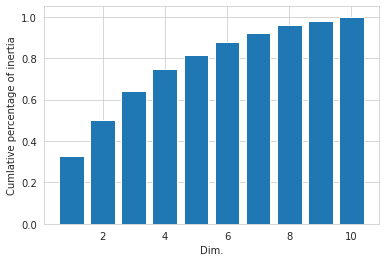

In [50]:
#solution
plt.bar(np.arange(1, 11), pca_scaled.explained_variance_ratio_.cumsum())
plt.xlabel('Dim.')
plt.ylabel('Cumlative percentage of inertia');
